#Starbucks Data Analysis Project
 **By:- ADITYA RAJ OJHA**


In [ ]:
import pandas as pd
gd=pd.read_csv('starbucks.csv')
import seaborn as sns
import matplotlib.pyplot as plt
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [ ]:
gd.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [ ]:
#DATA CLEANING.
'''
Since many column names contain spaces and brackets, it is important to clean them to avoid syntax
and indentation errors. Additionally, simpler column names are easier to use and analyze.
Example:- I have converted ' Total Fat (g)' which contained spaces and bracket into 'Total_Fat'
which is correct way of writing in python.
'''
gd = gd.rename(columns={' Total Fat (g)': 'Total_Fat', 'Trans Fat (g) ': 'Trans_Fat', 'Saturated Fat (g)': 'Saturated_Fat','Caffeine (mg) ':'Caffeine'})
gd = gd.rename(columns={' Sugars (g)': 'sugar',' Protein (g) ':'Protein','Vitamin A (% DV) ':'Vitamin_A',' Total Carbohydrates (g) ':'Total_Carbohydrates',' Dietary Fibre (g)':'Dietary_Fibre'})
'''
# Merging two columns into a single column is a process of combining more complex data that can be
  Easily analyzed. This allows us to work on the analysis of two columns simultaneously, by merging
  them into one. The advantage of this process is that it simplifies the data analysis by
  consolidating the information into a single column.
'''
merged_column = gd['Beverage'] + gd['Beverage_prep']
gd['Merged_Column'] = merged_column
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Beverage_category    242 non-null    object 
 1   Beverage             242 non-null    object 
 2   Beverage_prep        242 non-null    object 
 3   Calories             242 non-null    int64  
 4   Total_Fat            242 non-null    object 
 5   Trans_Fat            242 non-null    float64
 6   Saturated_Fat        242 non-null    float64
 7    Sodium (mg)         242 non-null    int64  
 8   Total_Carbohydrates  242 non-null    int64  
 9   Cholesterol (mg)     242 non-null    int64  
 10  Dietary_Fibre        242 non-null    int64  
 11  sugar                242 non-null    int64  
 12  Protein              242 non-null    float64
 13  Vitamin_A            242 non-null    object 
 14  Vitamin C (% DV)     242 non-null    object 
 15   Calcium (% DV)      242 non-null    obj

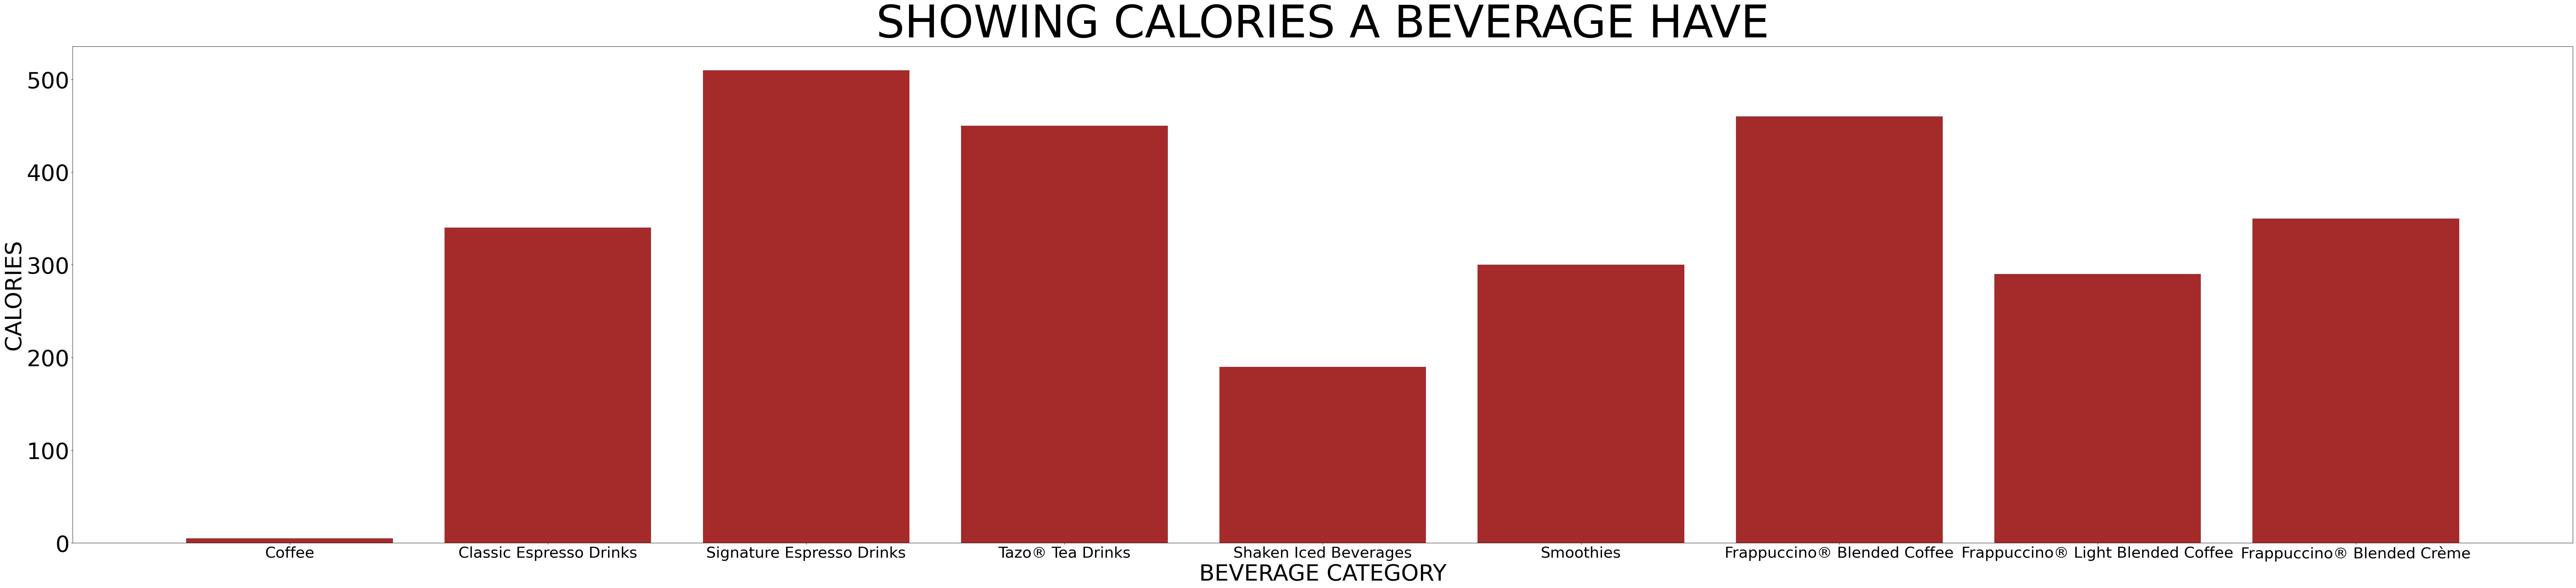

In [ ]:
#1. Relationship between beverage type or category and the calories associated with it.
'''
# The below graph gives an idea about the calories a particular beverage has, we can use it to distinguish which
  beverage a health-conscious person should opt for to maintain their diet.
# According to the graph a person should opt for coffee since it has the lowest calories and should avoid signature
  espresso drinks since they contain the highest amount of calories among other beverages.
# A person can opt for a drink according to his/her calorie requirement from the graph.
'''
Beverage_category=list(gd.Beverage_category)
Calories=list(gd.Calories)
fig=plt.figure(figsize=(100,20))
plt.bar(Beverage_category,Calories,color='brown') # Using Bar graph from matplotlib.pyplot library.
plt.xlabel('BEVERAGE CATEGORY', fontsize=50)
plt.ylabel('CALORIES', fontsize=50)
plt.title('SHOWING CALORIES A BEVERAGE HAVE', fontsize=100)
plt.xticks(fontsize=34)
plt.yticks(fontsize=50)
plt.show()

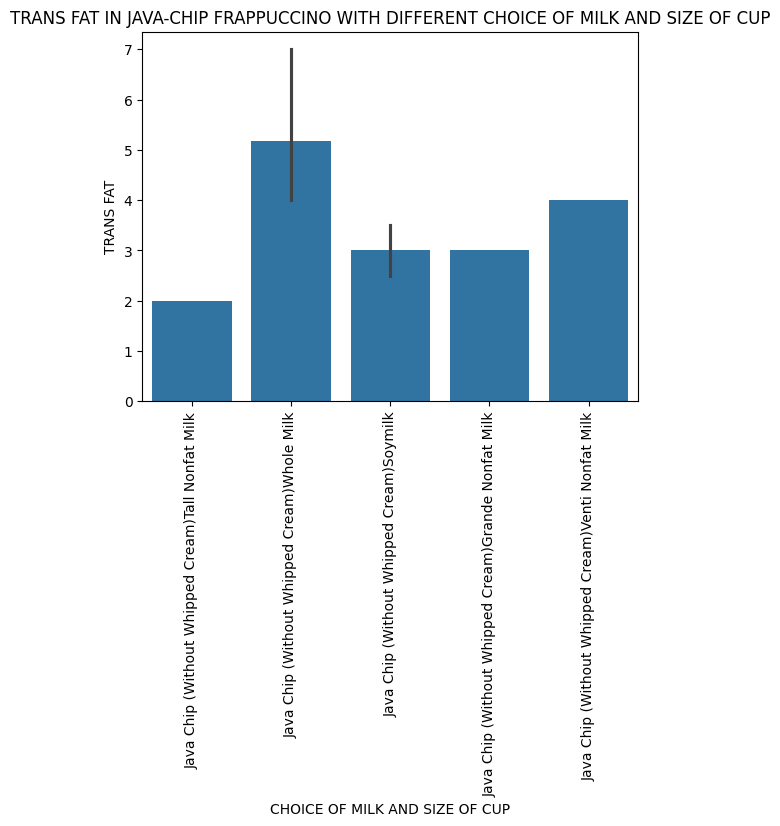

In [ ]:
#2.Relationship between trans_fat and add-on with
'''
# The below graph gives an idea about the Trans_fat of a beverage called Java chip frappuccino according to
  different customizations like choice of milk and size of cup of beverage.
# According to the graph a person should opt for non-fat milk since it contains least amount of trans fat and
  should opt for a tall size to have the least amount of trans fat intake.
# A person can see which customization he/she should opt for according to their choice of intake of Trans fat
  from the graph.
# INFERENCE:- we can infer from graph that non-fat milk has least trans-fat followed by soy milk and then whole
  milk , also the bigger the size of cup of beverage more is the trans fat.
'''
selected_rows= gd.iloc[208:216]
sns.barplot(x='Merged_Column', y='Trans_Fat',data=selected_rows) # Using Bar plot from seaborn library
plt.title('TRANS FAT IN JAVA-CHIP FRAPPUCCINO WITH DIFFERENT CHOICE OF MILK AND SIZE OF CUP')
plt.xlabel('CHOICE OF MILK AND SIZE OF CUP')
plt.ylabel('TRANS FAT')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

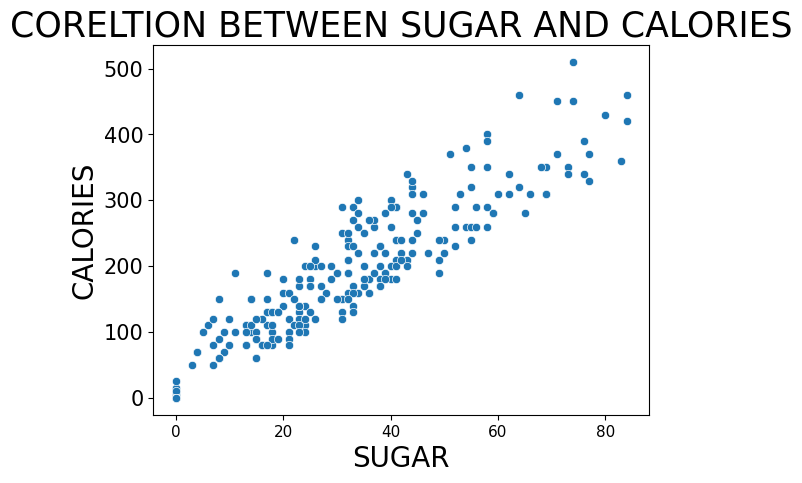

In [ ]:
#3.Relationship between sugar and calorie.
'''
# The below graph gives an idea about how calories and sugar are correlated to each other.
# INFERENCE:- we can infer from graph that the more sugar intake leads to more calorie consumption means there is
  a direct correlation between both of them i.e more sugar lead to more calories in our body.
'''
sns.scatterplot(x='sugar',y='Calories',data=gd) # Scatterplot is used from seaborn library.
plt.xlabel('SUGAR',fontsize=20)
plt.ylabel('CALORIES',fontsize=20)
plt.title('CORELTION BETWEEN SUGAR AND CALORIES',fontsize=25)
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)

(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

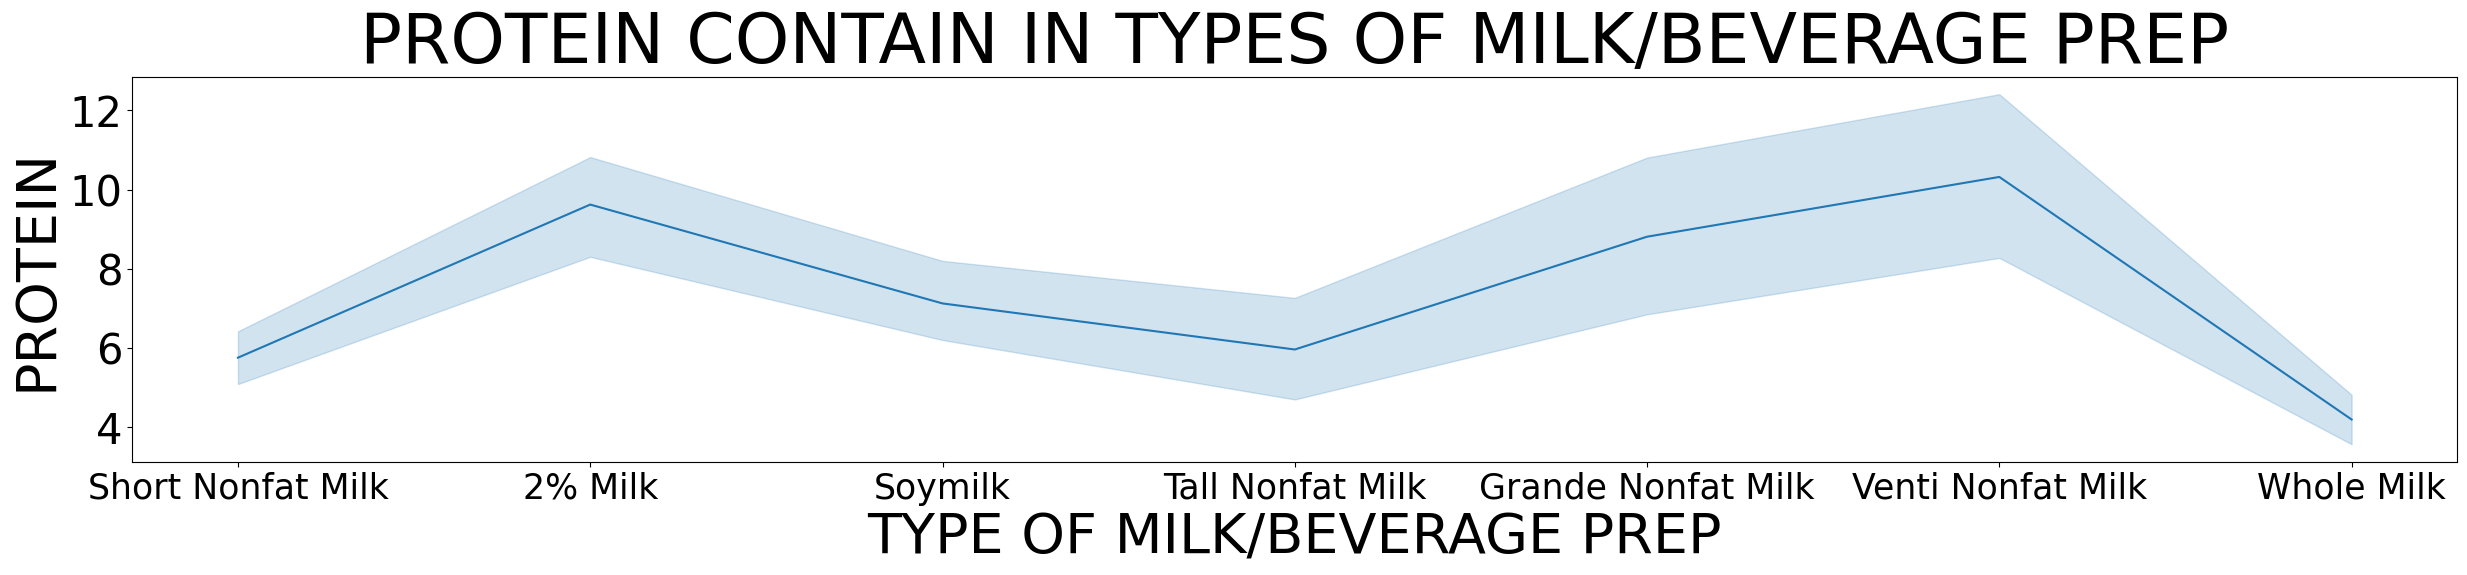

In [ ]:
#4. Relationship between the type of milk with the amount of protein it contains.
'''
# The below graph gives an idea about how protein content is associated with the choice of milk/veverage prep.
# INFERENCE:- we can infer from the graph that whole milk contains the least amount of protein while soymilk has more
  protein than whole milk and 2% of milk has the highest protein content but we cannot argue about non-fat milk
  since it has size reference withapproximatelythe an know that grande non-fat milk has approcimatly same protea
  as of 2% milk.
'''
excluded_values = ['Short', 'Tall', 'Grande', 'Venti', 'Doppio','Solo']
''' Here, I excluded some values from the column that I didn't want to analyze.'''
filtered_gd = gd[~gd['Beverage_prep'].isin(excluded_values)]
fig=plt.figure(figsize=(30,5))
sns.lineplot(x='Beverage_prep',y='Protein',data=filtered_gd) # Line plot is used from Seaborn library.
plt.xlabel('TYPE OF MILK/BEVERAGE PREP',fontsize=40)
plt.ylabel('PROTEIN',fontsize=40)
plt.title('PROTEIN CONTAIN IN TYPES OF MILK/BEVERAGE PREP',fontsize=50)
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)



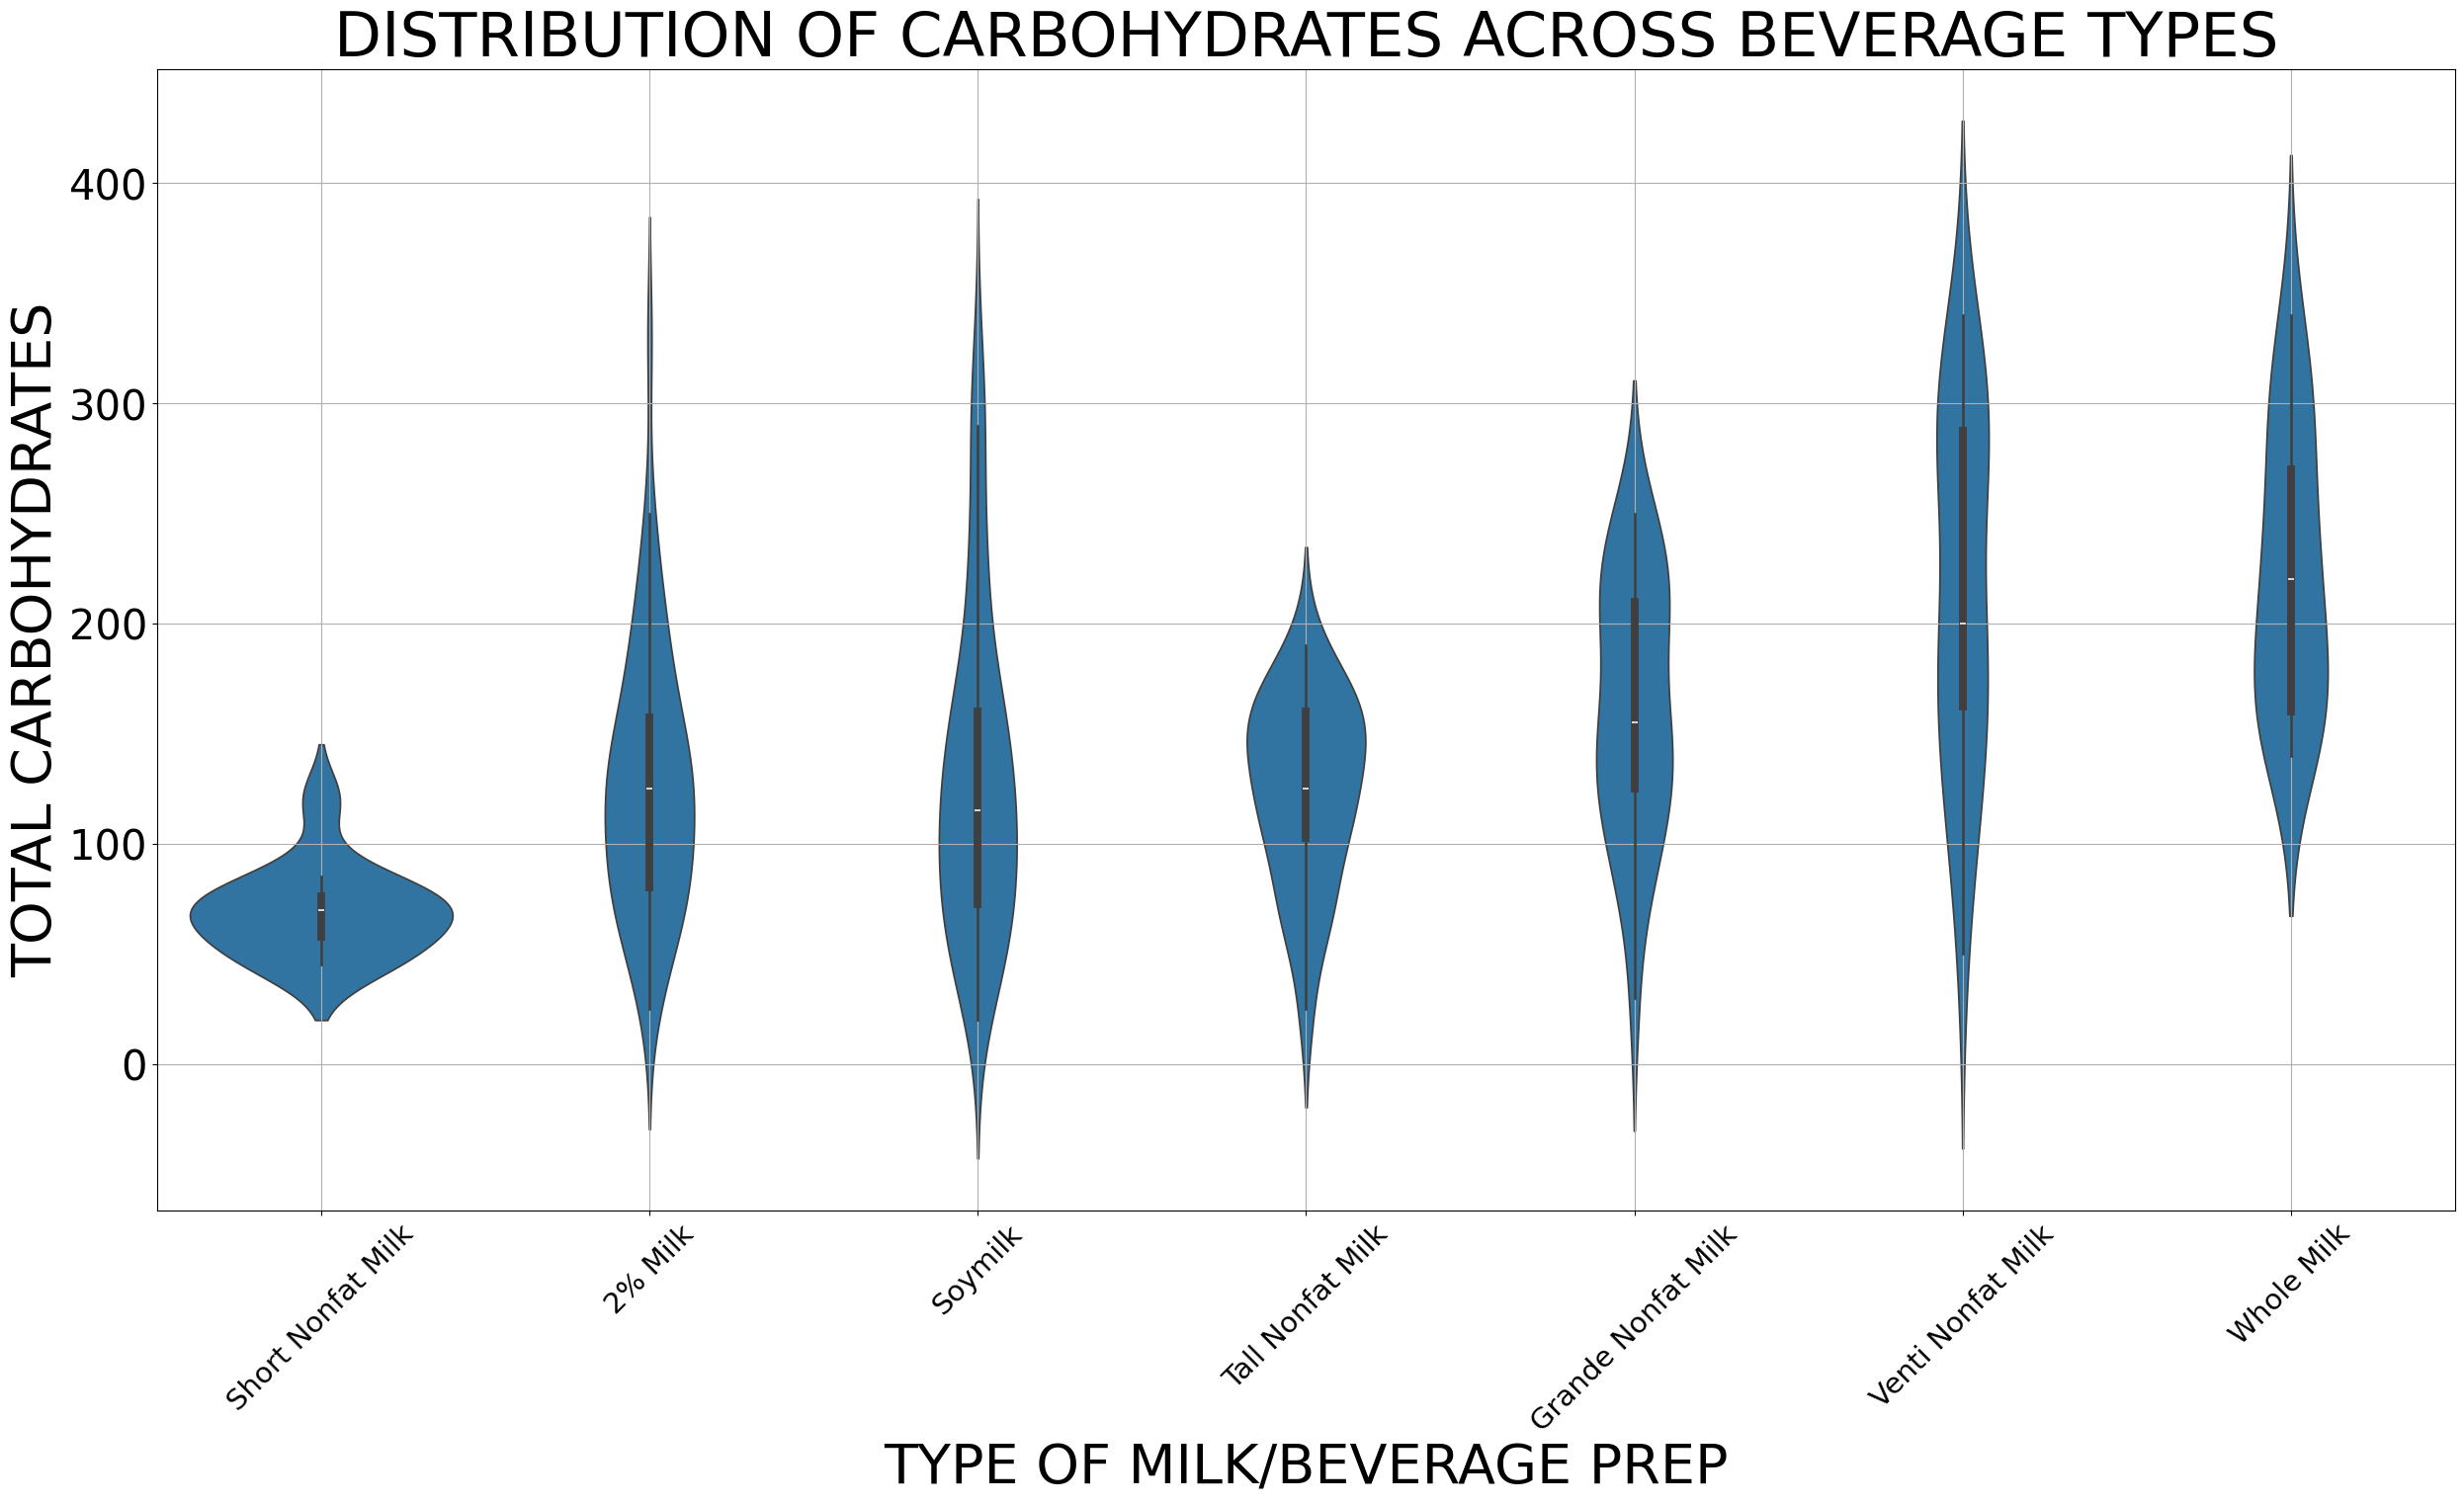

In [ ]:
#5.Relationship between type of milk and the total_carbohydrate it contains and w
'''
# The above graph respresnts for the type of milk or beverage_prep how many beverage will have
  Total_calorie in a particular range,the darker the bin or region means more beverages lie in
  that region.
# for example we have 'soymilk' and in that we have different bins each bin range is defined along
  y axis i.e each bin's width describe the range of calories. The darker the bin means the data in
  that bin has been repeated so majority of beverage which contains soymilk in it has calorie in
  range of this darker region.
# INFERENCE:- The below graph shows us for a particular type of milk or beverage_type ,what is the
  range of total calories which has been repeated many times and this repeatition means more beverages
  containing that type of milk falls under this category of total calories.
'''
plt.figure(figsize=(30,15))
sns.violinplot(x='Beverage_prep', y='Total_Carbohydrates', data=filtered_gd)
plt.xlabel('TYPE OF MILK/BEVERAGE PREP', fontsize=40)
plt.ylabel('TOTAL CARBOHYDRATES', fontsize=40)
plt.title('DISTRIBUTION OF CARBOHYDRATES ACROSS BEVERAGE TYPES', fontsize=45)
plt.xticks(rotation=45, fontsize=21)
plt.yticks(fontsize=30)
plt.grid(True)
